# ДЗ №9 Decission Trees classification
Добавлено: 09.10.2021 11:33
Сдать до 17 января 17:00

* Используйте все изученные техники для определения есть ли у человека диабет по предоставленным данным.
* Визуализируйте дерево решений. 
* Также используйте случайный лес. 
* Можно ли визуализировать случайный лес?
* Проведите анализ полученного дерева. 
* Проанализируйте признаки и их значимость.
* Попробуйте разные метрики и гиперпараметры, какие гиперпараметры были лучшими?

Опционально:
    
* Используйте ещё один метод ансамблирования из sklearn.ensemble (Stacking, Bagging, Voting). 
* Как он работает? Используйте другие изученные классификаторы для усиления модели выбранным методом. 

pima-indians-diabetes.csv

# Import section

In [1]:
# Base library
import numpy as np                                        # Linear algebra
import pandas as pd                                       # Data processing

# Visualization library
import matplotlib.pyplot as plt                           # Plotting library 
import seaborn as sns                                     # Data visualization

# Displays output inline
%matplotlib inline     

In [2]:
# Machine learning library
from sklearn.linear_model import LogisticRegression       # Class implements regularized logistic regression
from sklearn.neighbors import KNeighborsClassifier        # KNN Classifier

from sklearn.model_selection import train_test_split      # Split arrays
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Data section

<h3 align=<'center'>Сахарные диабет 1-го и 2-го типа</h3>
<img src='brochure.jpg'  width=800 height=640 ></img>

Сахарный диабет — группа эндокринных заболеваний, связанных с нарушением усвоения глюкозы и развивающихся вследствие абсолютной или относительной недостаточности гормона инсулина, в результате чего развивается гипергликемия — стойкое увеличение содержания глюкозы в крови. Заболевание характеризуется хроническим течением, а также нарушением всех видов обмена веществ: углеводного, жирового, белкового, минерального и водно-солевого.

https://ru.wikipedia.org/wiki/Сахарный_диабет

Pima Indians Diabetes dataset - Attribute Information:

1. Pregnancies - количество беременностей.

2. Glucose - результат орального теста на толерантность к глюкозе:

*  лабораторный тест, позволяющий проверить, как организм переносит сахар из крови в ткани тела.

3. BloodPressure - диастолическое артериальное давление (мм.рт.ст.):

* Норма < 80 
* Гипертония 1 стадия  = (80 - 89) 
* Гипертония 2 стадия  > (90 - 120) 
* Гипертонический криз > (120 и выше)

4. SkinThickness - толщина кожной складки трицепса в (мм), для прогноза общего количества жира в организме:

* Мужчины - 2.5мм / 20% жира 
* Женщины - 18.0мм / 30% жира

5. Insulin - инсулин.

6. BMI - индекс массы тела, метод оценки избыточного или недостаточного веса (BMI = weight(kg)/[height(m)]²), categories:

* Underweight = <18.5
* Normal weight = 18.5–24.9
* Overweight = 25–29.9
* Obesity = BMI of 30 or greater

7. DiabetesPedigreeFunction - функция родословной диабета:

* истории сахарного диабета у родственников и генетическом родстве этих родственников с пациентом.

8. Age - возраст (лет).

10. Class - target:

* 0 - если не диабетик  
* 1 - если диабетик

## Load the data

In [3]:
# Read pima-indians-diabetes.csv file as a DataFrame called diabetes.
diabetes = pd.read_csv("pima-indians-diabetes.csv")

## Exploratory data analysis and visualization

In [4]:
# Preview the data
# Title DataFrame diabetes (return the first `n` rows) 
diabetes.head(n=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
# Tail DataFrame diabetes (return the last `n` rows)
diabetes.tail(n=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Print a concise summary of a DataFrame.
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
# Column names
print(f"Column names: \n{diabetes.columns}")

Column names: 
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')


In [8]:
# Data dimensionality
print(f"Shape: \n{diabetes.shape}")

Shape: 
(768, 9)


In [9]:
# Data types for each attribute
print(f"Data types: \n{diabetes.dtypes}")

Data types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object


In [10]:
# Detect missing values.
print(f"Missing values by attribute: \n{diabetes.isnull().sum()}")

Missing values by attribute: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64


In [11]:
# Descriptive Statistics:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


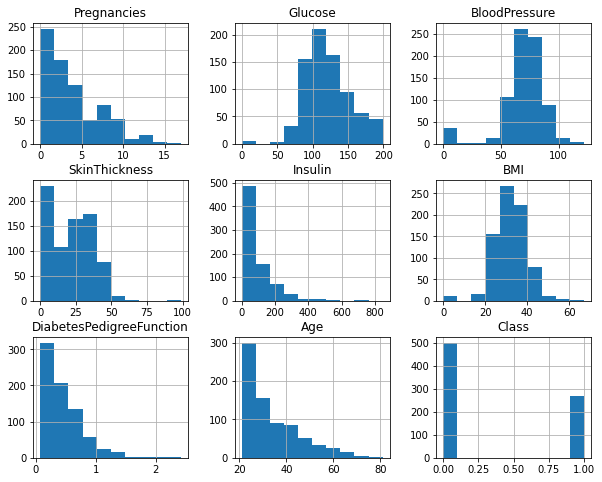

In [12]:
# Dataframe visualization
# Построим дополнительно -histogram, -pairplot для лучшего понимания структуры данных (как между собой разделяются классы). 
 
# Plot histogram
diabetes.hist(figsize=(10,8));

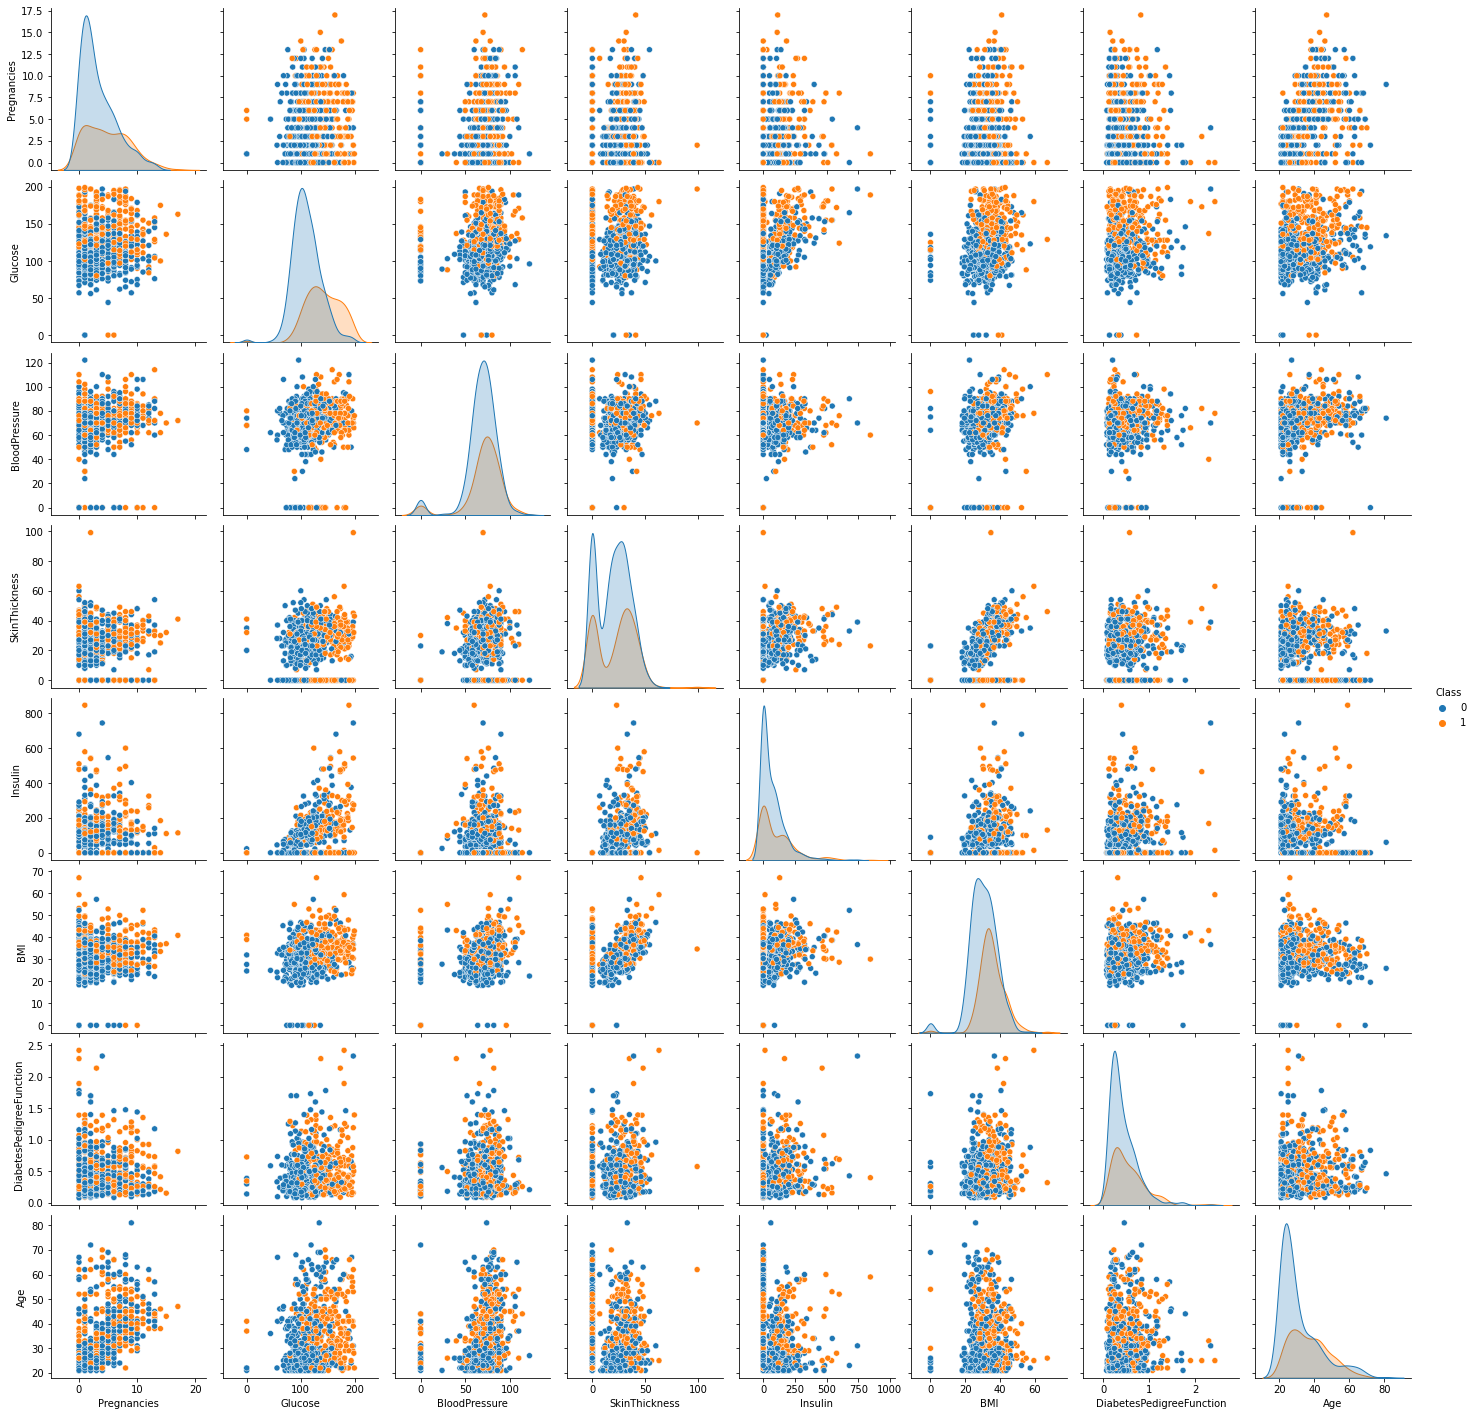

In [13]:
# Plot pairwise relationships in a dataset.
sns.pairplot(data=diabetes, hue='Class');

In [14]:
# Построим матрицу корреляции между признаками на исходных данных:

# Весь набор данных
plt.figure(figsize=(10,8))
diabetes.corr()
#sns.heatmap(diabetes.corr(),annot=True, cmap="coolwarm");

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Figure size 720x576 with 0 Axes>

0    500
1    268
Name: Class, dtype: int64 



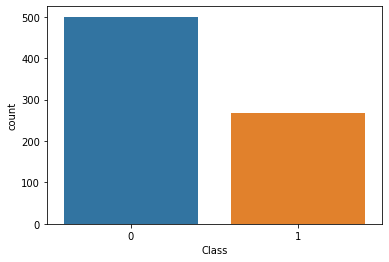

In [15]:
# Рассмотрим целевую/target переменную - 'Class'.
# Для проверки численности/балансировки классов используем функции:
#    value_counts() - для числового представления, 
#    countplot()    - для графического представления.

# Distribution of data by class, text
print(diabetes['Class'].value_counts(), '\n')

# Distribution of data by class, graphic
sns.countplot(data=diabetes, x='Class');

Summary of dataset:

* общее количество колонок - 9 (8 атрибутов и одна целевая переменная)
* количество сэмплов/строк – 768
* пропущенных значении - 0
* все признаки - являются числовыми значениями
* целевая переменная - 'Class' содержит два класса: class 0 - если не диабетик 500/65% и class 1 - если диабетик 268/35% (Присутствует дисбаланс классов.)
* имеются нулевые значения в атрибутах -Glucose -BloodPressure -SkinThickness -Insulin –BMI.

In [16]:
## Zero values, search and fill

# Как видно из Descriptive Statistics и -pairplot атрибуты -Glucose -BloodPressure -SkinThickness -Insulin -BMI, 
# имеют нулевые значения, означает что были ошибки в показаниях или значения отсутствовали и заполнили нулями. 

# Glucose, zero values:
print("Glucose, zero values       : ", len(diabetes[diabetes["Glucose"]==0]))

# BloodPressure, zero values:
print("BloodPressure, zero values : ", len(diabetes[diabetes["BloodPressure"]==0]))

# SkinThickness, zero values:
print("SkinThickness, zero values : ", len(diabetes[diabetes["SkinThickness"]==0]))

# Insulin, zero values:
print("Insulin, zero values       : ", len(diabetes[diabetes["Insulin"]==0]))

# BMI, zero values:
print("BMI, zero values           : ", len(diabetes[diabetes["BMI"]==0]))

Glucose, zero values       :  5
BloodPressure, zero values :  35
SkinThickness, zero values :  227
Insulin, zero values       :  374
BMI, zero values           :  11


Note: Количество нулевых значений по атрибутам: 5-Glucose / 35-BloodPressure / 227-SkinThickness / 374-Insulin / 11-BMI

Возможные стратегии:

* заполнинить средним по атрибуту
* заполнить медианой
* заполнить медианой или средним в зависимости от распределения
* удалить данные с нулевыми значениями
* использовать заполнители из sklearn

Используем два первых варианта для сравнения. В качестве основного в работе выберем медиану, т.к. некоторые атрибуты (227-SkinThickness / 374-Insulin) не имеют нормального распределения и имеют найбольшее количество нулевых значении.

In [17]:
# Заполним нулевые значения Glucose/BloodPressure/SkinThickness/Insulin/BMI медианой -median() по атрибуту.
# Для mean() только результаты ниже в сравнении

diabetes['Glucose'].replace(0,diabetes['Glucose'].median(axis=0),inplace=True)
diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].median(axis=0),inplace=True)
diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median(axis=0),inplace=True)
diabetes['Insulin'].replace(0,diabetes['Insulin'].median(axis=0),inplace=True)
diabetes['BMI'].replace(0,diabetes['BMI'].median(axis=0),inplace=True)

In [18]:
# Построим матрицу корреляции между признаками на обработаных данных:

# Весь набор данных
#plt.figure(figsize=(10,8))
diabetes.corr()
#sns.heatmap(diabetes.corr(),annot=True, cmap="coolwarm");

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [19]:
# Изменение соотношении между атрибутами и target переменной до и после заполнения нулевых значении 

#                   Pregnancies 	Glucose 	BloodPressure 	SkinThickness 	Insulin 	BMI 	DiabetesPedigreeFunction 	Age

# Until fill        0.221898 	   0.466581 	0.065068 	    0.074752 	    0.130548 	0.292695 	0.173844 	        0.238356     Class
# After fill mean   0.221898 	   0.492908 	0.162986 	    0.175026 	    0.179185 	0.312254 	0.173844 	        0.238356     Class
# After fill median 0.221898 	   0.492782 	0.165723 	    0.189065 	    0.148457 	0.312249 	0.173844 	        0.238356     Class

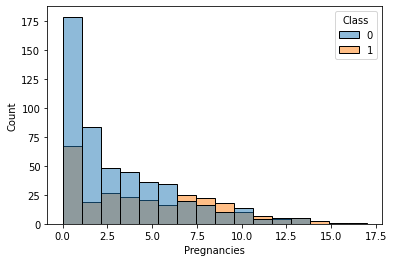

In [20]:
# Построим дополнительно распределение всех атрибутов и их влияние на целевую переменную.
# Атрибут Pregnancies
sns.histplot(x="Pregnancies", hue="Class", data=diabetes);

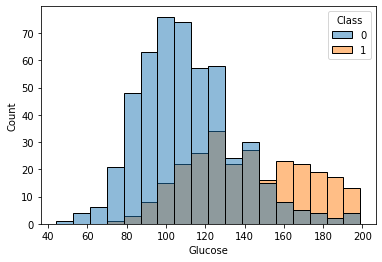

In [21]:
# Атрибут Glucose
sns.histplot(data=diabetes, x='Glucose', hue='Class');

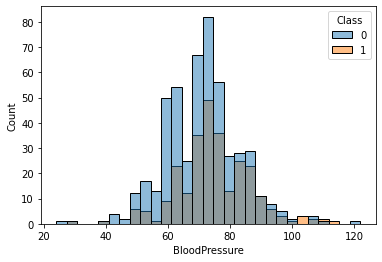

In [22]:
# Атрибут BloodPressure
sns.histplot(data=diabetes, x='BloodPressure', hue='Class');

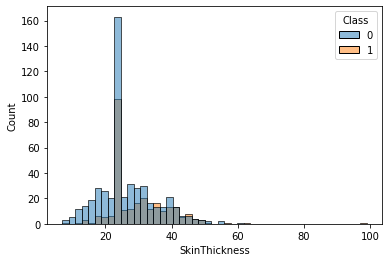

In [23]:
# Атрибут SkinThickness
sns.histplot(x="SkinThickness", hue="Class", data=diabetes);

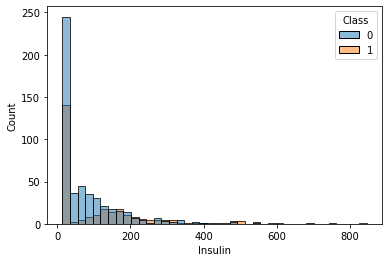

In [24]:
# Атрибут Insulin
sns.histplot(x="Insulin", hue="Class", data=diabetes);

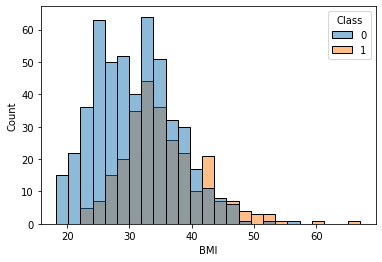

In [25]:
# Атрибут BMI
sns.histplot(x="BMI", hue="Class", data=diabetes);

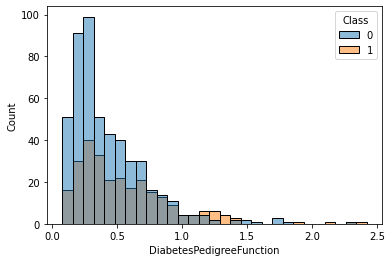

In [26]:
# Атрибут DiabetesPedigreeFunction
sns.histplot(x="DiabetesPedigreeFunction", hue="Class", data=diabetes);

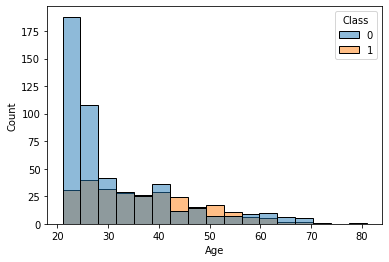

In [27]:
# Атрибут Age
sns.histplot(x="Age", hue="Class", data=diabetes);

Summary of attributes:

* Pregnancies: Диапазон от 0 до 17 и в среднем 4. 
* Glucose/ Глюкоза: от 0/44* до 199 и в среднем 121.
* Blood pressure/ Артериальное давление: От 0/24* до 122, среднее значение  среднее значение - 69/72
* Skin thickness/ Толщина кожи: Диапазон от 0/7* до 99, а среднее значение составляет 21/27. 
* Insulin/ Инсулин: Варьируется от 0/14* до 846. Среднее значение - 80/94.
* BMI/ ИМТ: Диапазон от 0/18* до 67,1, среднее значение - 32.
* Diabetes pedigree function/ Родословная диабета: Диапазон от 0,078 до  2,42, а среднее значение - 0,47. 
* Age: Диапазон от 21 до 81 года, средний возраст - 33 года.

*через черту, после заполнения. Также видно влияние заполнения в виде вертикальных всплесков на графиках.

## Train Test Split

In [28]:
# Разделим данные на тестовые и обучающие, с учетом распределения классов:

In [29]:
test_size=0.25     # Размер тестового набора
random_state=21  

In [30]:
# Column names
print(f"Column names: \n{diabetes.columns}")

Column names: 
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')


In [31]:
# inputs / Массив X, содержит признаки для обучения
X = diabetes.drop("Class", axis=1)

# outputs / Массив у с целевой переменной
y = diabetes["Class"]

In [32]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state, 
                                                    shuffle=True, 
                                                    stratify=y)

In [33]:
# Data dimensionality and class distribution on train set
print(f"Shape X_train: \n{X_train.shape}\n")
print(f"Class distribution y_train: \n{y_train.value_counts()}")

Shape X_train: 
(576, 8)

Class distribution y_train: 
0    375
1    201
Name: Class, dtype: int64


In [34]:
# Data dimensionality and class distribution on test set
print(f"Shape X_test: \n{X_test.shape}\n")
print(f"Class distribution y_test: \n{y_test.value_counts()}")

Shape X_test: 
(192, 8)

Class distribution y_test: 
0    125
1     67
Name: Class, dtype: int64


In [35]:
folds = 10

# Returns K-Folds cross-validator
kf = KFold(n_splits=folds, random_state=random_state, shuffle=True)

# Returns stratified folds
skf = StratifiedKFold(n_splits=folds, random_state=random_state, shuffle=True)

In [36]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Building models

## Logistic Regression Model (Base and Grid)

In [37]:
# Build base model LogisticRegression()

# Instantiate a classifier
base_log_model = LogisticRegression()

# Train classifer
base_log_model.fit(scaled_X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{base_log_model.get_params()}", '\n')

Model parameters: 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 



Accuracy classification score: 
 0.7447916666666666 

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       125
           1       0.70      0.46      0.56        67

    accuracy                           0.74       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.74      0.74      0.73       192
 

Confusion matrix (text mode): 
 [[112  13]
 [ 36  31]] 

Confusion matrix (graphic mode):


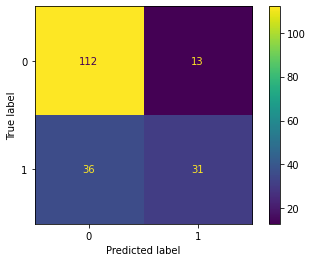

In [38]:
# Model Performance

# Predict class labels for samples in X
base_log_y_pred = base_log_model.predict(X = scaled_X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, base_log_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, base_log_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, base_log_y_pred), '\n')

# Build confusion matrix in graphic mode
print("Confusion matrix (graphic mode):"), plot_confusion_matrix(base_log_model, scaled_X_test, y_test);

In [39]:
################################################################################################

In [40]:
# Build grid model LogisticRegression()

# Create a list of dictionaries called param_grid and fill out some parameters for C, penalty.
# Для каждого solver свой набор параметров (не все solver поддерживают одни и те же параметры)

C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = [{'solver':['lbfgs'],     'C':C, 'penalty':['l2']},
              {'solver':['saga'],      'C':C, 'penalty':['l1', 'l2']},
              {'solver':['liblinear'], 'C':C, 'penalty':['l1', 'l2']}]

# Instantiate a classifier
grid_log_model = GridSearchCV(estimator=LogisticRegression(),
                              param_grid=param_grid,
                              refit=True,
                              verbose=1,
                              cv=skf,
                              scoring='accuracy',
                              n_jobs=-1)
# scoring='accuracy' -> Strategy to evaluate the performance of the cross-validated model on the test set.
# n_jobs=-1          -> Number of jobs to run in parallel.

# Train classifer
grid_log_model.fit(scaled_X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{grid_log_model.get_params()}", '\n')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Model parameters: 
{'cv': StratifiedKFold(n_splits=10, random_state=21, shuffle=True), 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_jobs': -1, 'param_grid': [{'solver': ['lbfgs'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}, {'solver': ['saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}, {'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}], 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 

Best model:  
LogisticRegression(C=0.1, solver='liblinear')
Best parameter values: 
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy classification score: 
 0.75 

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       125
           1       0.71      0.48      0.57        67

    accuracy                           0.75       192
   macro avg       0.74      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192
 

Confusion matrix (text mode): 
 [[112  13]
 [ 35  32]] 

Confusion matrix (graphic mode):


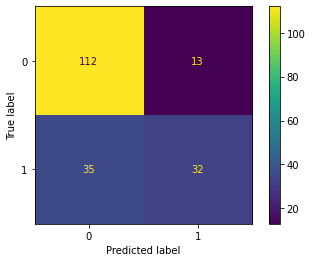

In [41]:
# Model Performance

#Best model
print(f"Best model:  \n{grid_log_model.best_estimator_}")

# Best parameter values
print(f"Best parameter values: \n{grid_log_model.best_params_}")

# Predict class labels for samples in X
grid_log_y_pred = grid_log_model.predict(X = scaled_X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, grid_log_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, grid_log_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, grid_log_y_pred), '\n')

# Build confusion matrix in graphic mode
print("Confusion matrix (graphic mode):"), plot_confusion_matrix(grid_log_model, scaled_X_test, y_test);

# Compute macro-average ROC curve and ROC area
#plot_roc_curve(grid_log_model, X_test, y_test);

## Decision Tree Classifier Model (Base and Grid)

<h3 align=<'center'>Decision Tree - Classification</h3>
<img src='dt_slide.jpg'  width=800 height=640 ></img>

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

In [42]:
# Build base model DecisionTreeClassifier()

# Instantiate a classifier
base_dt_model = DecisionTreeClassifier()

# Для DT используем исходные данные без стандартизации, так как алгоритм DT не базируется не метриках расстояния
base_dt_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{base_dt_model.get_params()}", '\n')

Model parameters: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} 



Accuracy classification score: 
 0.6458333333333334 

Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.74       125
           1       0.49      0.43      0.46        67

    accuracy                           0.65       192
   macro avg       0.60      0.60      0.60       192
weighted avg       0.64      0.65      0.64       192
 

Confusion matrix (text mode): 
 [[95 30]
 [38 29]] 

Confusion matrix (graphic mode):


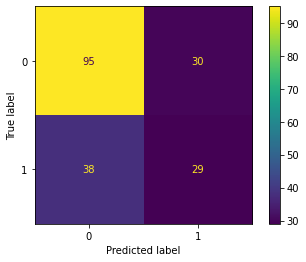

In [43]:
# Model Performance

# Predict class labels for samples in X
base_dt_y_pred = base_dt_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, base_dt_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, base_dt_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, base_dt_y_pred), '\n')

# Build confusion matrix in graphic mode
print("Confusion matrix (graphic mode):"), plot_confusion_matrix(base_dt_model, X_test, y_test);

# Plot a decision tree.
#plt.figure(figsize=(30,30), dpi=200)
#plot_tree(base_dt_model, feature_names=X.columns, filled=True, rounded=True);

In [44]:
################################################################################################

In [45]:
# Build grid model DecisionTreeClassifier()

# Create a list of dictionaries called param_grid and fill out some parameters

param_grid = {"criterion": ["gini", "entropy"],
               "splitter": ["best", "random"],
               "max_depth": np.arange(1,10),
               "max_leaf_nodes": np.arange(2,10)}

# Instantiate a classifier
grid_dt_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid=param_grid,
                              refit=True,
                              verbose=1,
                              cv=skf,
                              scoring='accuracy',
                              n_jobs=-1)
# scoring='accuracy' -> Strategy to evaluate the performance of the cross-validated model on the test set.
# n_jobs=-1          -> Number of jobs to run in parallel.

# Train classifer
grid_dt_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{grid_dt_model.get_params()}", '\n')

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Model parameters: 
{'cv': StratifiedKFold(n_splits=10, random_state=21, shuffle=True), 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(), 'n_jobs': -1, 'param_grid': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'accuracy', 'verbose': 1} 



Best model:  
DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, splitter='random')
Best parameter values: 
{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'splitter': 'random'}
Accuracy classification score: 
 0.734375 

Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.97      0.83       125
           1       0.83      0.30      0.44        67

    accuracy                           0.73       192
   macro avg       0.78      0.63      0.63       192
weighted avg       0.76      0.73      0.69       192
 

Confusion matrix (text mode): 
 [[121   4]
 [ 47  20]] 

Confusion matrix (graphic mode):


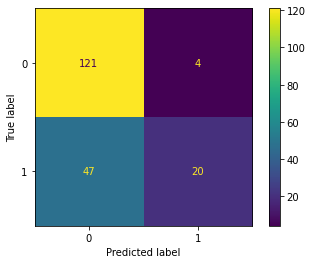

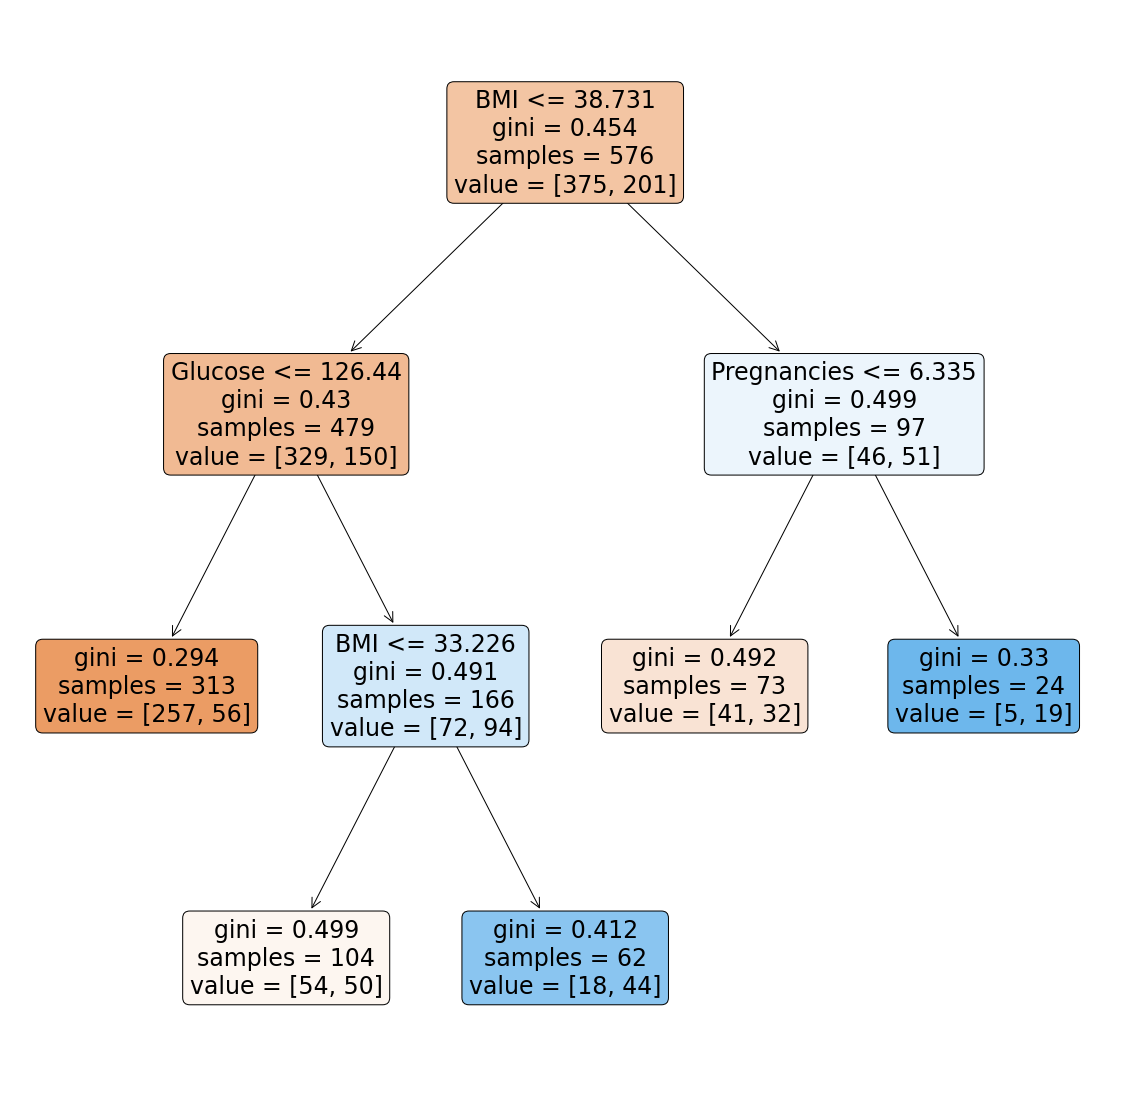

In [46]:
# Model Performance

#Best model
print(f"Best model:  \n{grid_dt_model.best_estimator_}")

# Best parameter values
print(f"Best parameter values: \n{grid_dt_model.best_params_}")

# Predict class labels for samples in X
grid_dt_y_pred = grid_dt_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, grid_dt_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, grid_dt_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, grid_dt_y_pred), '\n')

# Build confusion matrix in graphic mode
print("Confusion matrix (graphic mode):"), plot_confusion_matrix(grid_dt_model, X_test, y_test);

# Plot a decision tree.
plt.figure(figsize=(20,20))
plot_tree(grid_dt_model.best_estimator_, feature_names=X.columns, filled=True, rounded=True);

# Compute macro-average ROC curve and ROC area
#plot_roc_curve(grid_log_model, X_test, y_test);

## Random Forest Classifier Model

In [47]:
# Build base model RandomForestClassifier()

# Instantiate a classifier
base_rf_model = RandomForestClassifier()

# Для DT используем исходные данные без стандартизации, так как алгоритм DT не базируется не метриках расстояния
base_rf_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{base_rf_model.get_params()}", '\n')

Model parameters: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 



Accuracy classification score: 
 0.7604166666666666 

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       125
           1       0.73      0.49      0.59        67

    accuracy                           0.76       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.76      0.75       192
 

Confusion matrix (text mode): 
 [[113  12]
 [ 34  33]] 

Confusion matrix (graphic mode):


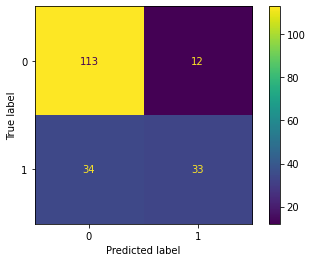

In [48]:
# Model Performance

# Predict class labels for samples in X
base_rf_y_pred = base_rf_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, base_rf_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, base_rf_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, base_rf_y_pred), '\n')

# Build confusion matrix in graphic mode
print("Confusion matrix (graphic mode):"), plot_confusion_matrix(base_rf_model, X_test, y_test);

# Plot a decision tree.
#plt.figure(figsize=(30,30), dpi=200)
#plot_tree(base_dt_model, feature_names=X.columns, filled=True, rounded=True);

## AdaBoost Classifier Model

AdaBoost - uses sample weighting and decision ’stumps’ (one-level decision trees) to classify samples

1. Build decision stumps for every feature, choosing the one with the best classiﬁcation accuracy
2. Assign more weight to misclassiﬁed samples and reward trees that diﬀerentiate them, where α = 0.5ln((1−TotalError)/TotalError)
3. Continue training and weighting decision stumps until convergence

In [49]:
# Build base model AdaBoostClassifier()

# Instantiate a classifier
base_ada_model = AdaBoostClassifier()

# Для DT используем исходные данные без стандартизации, так как алгоритм DT не базируется не метриках расстояния
base_ada_model.fit(X_train,y_train)

# Print Model parameters
print(f"Model parameters: \n{base_ada_model.get_params()}", '\n')

Model parameters: 
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None} 



Accuracy classification score: 
 0.75 

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.67      0.55      0.61        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192
 

Confusion matrix (text mode): 
 [[107  18]
 [ 30  37]] 

Confusion matrix (graphic mode):


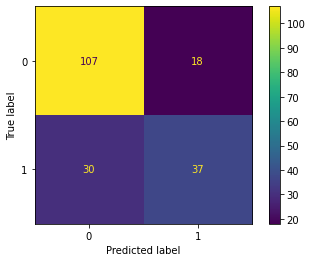

In [50]:
# Model Performance

# Predict class labels for samples in X
base_ada_y_pred = base_ada_model.predict(X = X_test)

# Accuracy classification score
print("Accuracy classification score: \n", accuracy_score(y_test, base_ada_y_pred), '\n')

# Build classification report
print("Classification report: \n", classification_report(y_test, base_ada_y_pred), '\n')

# Build confusion matrix in text mode
print("Confusion matrix (text mode): \n", confusion_matrix(y_test, base_ada_y_pred), '\n')

# Build confusion matrix in graphic mode
print("Confusion matrix (graphic mode):"), plot_confusion_matrix(base_ada_model, X_test, y_test);

# Plot a decision tree.
#plt.figure(figsize=(30,30), dpi=200)
#plot_tree(base_dt_model, feature_names=X.columns, filled=True, rounded=True);

## Feature Importances

Dependence of parameters in the model (text mode): 
 Glucose                     1.171113
BMI                         0.664990
DiabetesPedigreeFunction    0.440504
Pregnancies                 0.384084
Age                         0.156645
SkinThickness              -0.030342
BloodPressure              -0.121112
Insulin                    -0.144713
dtype: float64 

Dependence of parameters in the model (graphic mode): 



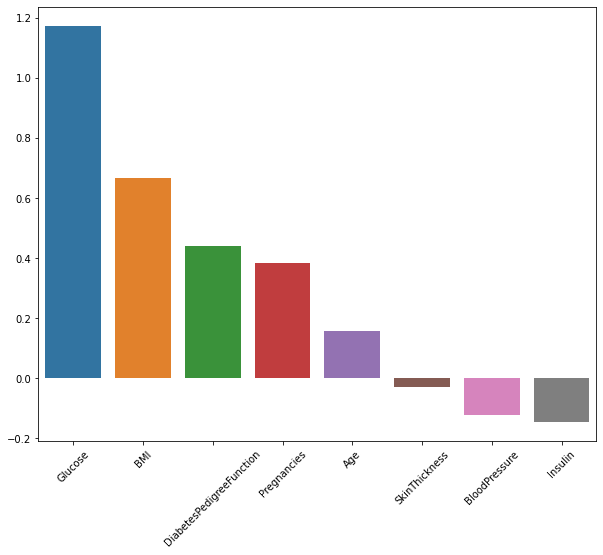

In [51]:
# Dependence of parameters in the model Grid Logistic Regression.

model = base_log_model

# Получим коэффициенты:
coefs = pd.Series(index=X.columns, data=base_log_model.coef_[0])
coefs = coefs.sort_values(ascending=False) # Сортировка

# Print Dependence of parameters in text mode
print("Dependence of parameters in the model (text mode): \n", coefs, '\n')

# Print Dependence of parameters in graphic mode
print("Dependence of parameters in the model (graphic mode): \n")
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.barplot(x=coefs.index, y=coefs.values);

In [52]:
################################################################################################

Dependence of parameters in the model (text mode): 
 Glucose                     0.352737
BMI                         0.177648
Pregnancies                 0.118196
DiabetesPedigreeFunction    0.091952
Age                         0.088975
BloodPressure               0.072972
Insulin                     0.052346
SkinThickness               0.045176
dtype: float64 

Dependence of parameters in the model (graphic mode): 



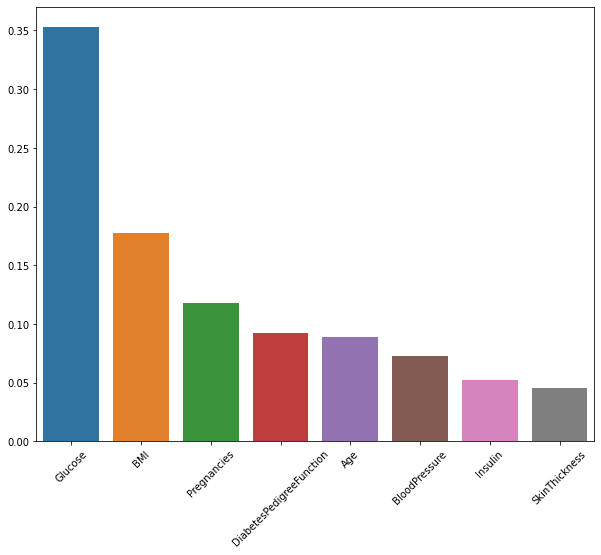

In [53]:
# Dependence of parameters in the model Base Decision Tree.

model = base_dt_model

# Получим коэффициенты:
coefs = pd.Series(index=X.columns, data=model.feature_importances_)
coefs = coefs.sort_values(ascending=False) # Сортировка

# Print Dependence of parameters in text mode
print("Dependence of parameters in the model (text mode): \n", coefs, '\n')

# Print Dependence of parameters in graphic mode
print("Dependence of parameters in the model (graphic mode): \n")
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.barplot(x=coefs.index, y=coefs.values);

In [54]:
################################################################################################

Dependence of parameters in the model (text mode): 
 Glucose                     0.246242
BMI                         0.166639
DiabetesPedigreeFunction    0.145420
Age                         0.122711
Pregnancies                 0.089954
BloodPressure               0.085747
Insulin                     0.072624
SkinThickness               0.070663
dtype: float64 

Dependence of parameters in the model (graphic mode): 



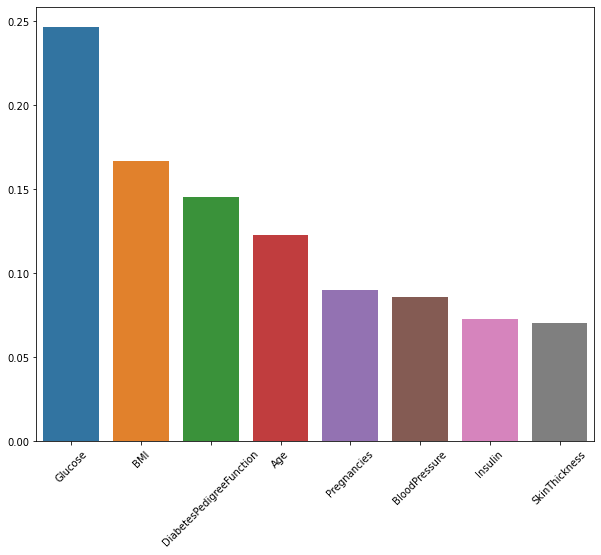

In [55]:
# Dependence of parameters in the model Base Random Forest.

model = base_rf_model

# Получим коэффициенты:
coefs = pd.Series(index=X.columns, data=model.feature_importances_)
coefs = coefs.sort_values(ascending=False) # Сортировка

# Print Dependence of parameters in text mode
print("Dependence of parameters in the model (text mode): \n", coefs, '\n')

# Print Dependence of parameters in graphic mode
print("Dependence of parameters in the model (graphic mode): \n")
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.barplot(x=coefs.index, y=coefs.values);

In [56]:
################################################################################################

Dependence of parameters in the model (text mode): 
 Glucose                     0.24
DiabetesPedigreeFunction    0.22
BMI                         0.18
Age                         0.16
Insulin                     0.08
Pregnancies                 0.04
BloodPressure               0.04
SkinThickness               0.04
dtype: float64 

Dependence of parameters in the model (graphic mode): 



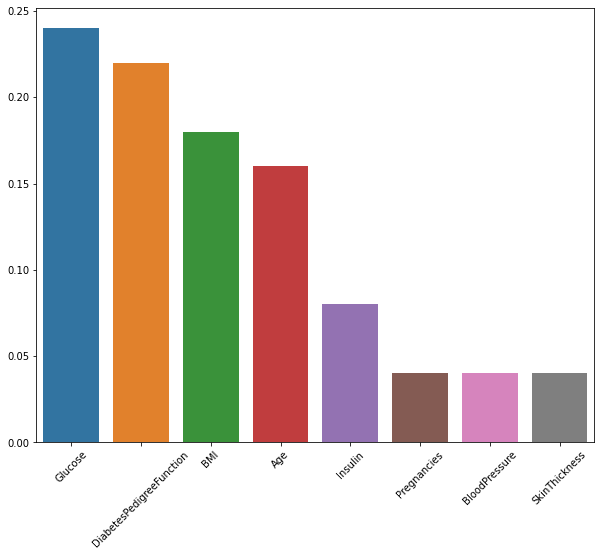

In [57]:
# Dependence of parameters in the model Base AdaBoost.

model = base_ada_model

# Получим коэффициенты:
coefs = pd.Series(index=X.columns, data=model.feature_importances_)
coefs = coefs.sort_values(ascending=False) # Сортировка

# Print Dependence of parameters in text mode
print("Dependence of parameters in the model (text mode): \n", coefs, '\n')

# Print Dependence of parameters in graphic mode
print("Dependence of parameters in the model (graphic mode): \n")
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.barplot(x=coefs.index, y=coefs.values);

# Summary:



Glucose является наиболее важным фактором в определении начала диабета, за которым следуют BMI/Age/Diabetes Pedigree Function (на разных моделях).
Другие факторы, такие как Pregnancies, Blood Pressure, Skin Thickness и Insulin, также вносят свой вклад в прогноз.

В данной работе на были использованы 6 моделей (base and grid logistic regression, base and grid decision trees, random forest, Ada boost) с акцентом на decision trees, машинного обучения на наборе данных о болезни диабетом индейцев племени Pima. Также были использованы разные методы заполнения некорректных данных. 
Для визуализации decision trees использовалась функция plot_tree(estimator_name) из sklearn.tree.


Результаты оценок моделей, и наилучшие параметры grid model приведены ниже.

In [58]:
# Для LogisticRegression регрессий:
print(f"Best parameter values: \n{grid_log_model.best_params_}")

Best parameter values: 
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [59]:
# Для DecisionTreeClassifier:
print(f"Best parameter values: \n{grid_dt_model.best_params_}")

Best parameter values: 
{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'splitter': 'random'}


In [60]:
# Результаты accuracy для построенных моделей:

print(f"Accuracy Base Log Model: \n{accuracy_score(y_test, base_log_y_pred):.4f}")
print(f"Accuracy Grid Log Model: \n{accuracy_score(y_test, grid_log_y_pred):.4f}")
print(f"Accuracy Base DT Model: \n{accuracy_score(y_test, base_dt_y_pred):.4f}")
print(f"Accuracy Grid DT Model: \n{accuracy_score(y_test, grid_dt_y_pred):.4f}")
print(f"Accuracy Base RF Model: \n{accuracy_score(y_test, base_rf_y_pred):.4f}")
print(f"Accuracy Grid Ada Model: \n{accuracy_score(y_test, base_ada_y_pred):.4f}")

Accuracy Base Log Model: 
0.7448
Accuracy Grid Log Model: 
0.7500
Accuracy Base DT Model: 
0.6458
Accuracy Grid DT Model: 
0.7344
Accuracy Base RF Model: 
0.7604
Accuracy Grid Ada Model: 
0.7500


Базовые модели AdaBoost и Random Forest показали лучшую оценку (accuracy) чем единичное дерево. В плане предсказания класса 1 (наличие диабета) лучшей на данном дата сете оказалась Grid Logistic Regression -0.71.

In [61]:
################################################################################################